In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def simulate_price_path (S0, r, sigma, T, N, M):
    dt = T/N
    paths = np.zeros ((M, N + 1))
    paths [:, 0] = S0
    for i in range(1, N + 1):
        z = np.random.normal (0, 1, M)
        paths[:, i] = paths [:, i - 1]* np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt)*z)
    return paths

In [6]:
def compute_payoff(paths, K, barrier, type='call'):
    N = paths.shape[1] - 1 
    if type == 'call':
        payoff = np.maximum(paths[:, N] - K, 0)
    else:
        payoff = np.maximum(K - paths[:, N], 0)
    hit_barrier = np.any(paths < barrier, axis=1)
    payoff[hit_barrier]= 0
    return payoff


In [7]:
def plot_price_paths(paths):
    plt.plot(paths.T)
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.title('Simulated Stock Price Paths')
    plt.show()

In [8]:
def price_barrier_option(S0, r, sigma, T, K, barrier, N, M, type='call'):
    paths = simulate_price_path (S0, r, sigma, T, N, M)
    payoff = compute_payoff(paths, K, barrier, type)
    option_price = np.exp(-r * T) * np.mean(payoff)
    return option_price

In [9]:
S0 = 100.0
r = 0.05
sigma = 0.2
T = 1.0
K = 100.0
barrier = 80.0
N = 365
M = 10000

Barrier Option Price 10.327976610567656


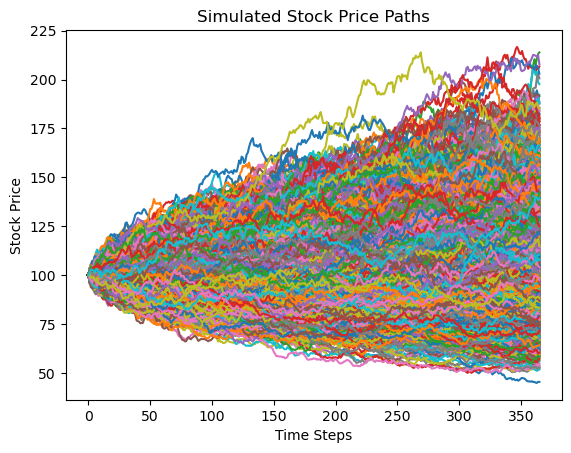

In [11]:
price = price_barrier_option(S0, r, sigma, T, K, barrier, N, M)
print ('Barrier Option Price', price)

paths = simulate_price_path(S0, r, sigma, T, N, M)
plot_price_paths(paths)